In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
df = pd.read_csv('bake-off-weeks.csv')
df.head()

,Week,Series,Episode,Label
0,Cakes,1,1,NaN
1,Biscuits,1,2,NaN
2,Bread,1,3,NaN
3,Puddings,1,4,Quarter-Final
4,Pastry,1,5,Semi-Final


In [41]:
# groub by week
df_grouped = df.groupby('Week')
print(df_grouped)

# find most common themes
themes = df['Week'].value_counts()
print(themes)

Week
Cakes                      16
Bread                      16
Biscuits                   15
Pastry                     14
Desserts                   14
Final                      13
Patisserie                 13
Chocolate                   4
Caramel                     3
Puddings                    3
Botanical                   2
Sweet Dough                 2
Pies                        2
Alternative Ingredients     2
Tarts                       2
Pies and Tarts              2
Japanese                    1
80s                         1
German                      1
Free-from                   1
Festivals                   1
Autumn                      1
Mexican                     1
Halloween                   1
Custard                     1
Party                       1
Dairy                       1
70s                         1
Back to School              1
Roaring 20s                 1
Tudor                       1
Danish                      1
Vegan                       1
Spice

In [42]:
# what series didn't have biscuits?
# find rows where week is biscuits
biscuits = df[df['Week'] == 'Biscuits']
print(biscuits)

series = df['Series']
no_biscuits = series[~series.isin(biscuits['Series'])]
print(no_biscuits.unique())

         Week  Series  Episode          Label
1    Biscuits       1        2            NaN
9    Biscuits       2        4            NaN
21   Biscuits       3        8  Quarter-Final
35   Biscuits       5        2            NaN
45   Biscuits       6        2            NaN
55   Biscuits       7        2            NaN
65   Biscuits       8        2            NaN
74   Biscuits       9        1            NaN
85   Biscuits      10        2            NaN
95   Biscuits      11        2            NaN
105  Biscuits      12        2            NaN
115  Biscuits      13        2            NaN
125  Biscuits      14        2            NaN
135  Biscuits      15        2            NaN
145  Biscuits      16        2            NaN
[4]


In [43]:
# Create a list of week sequences per series
series_orders = df.sort_values(['Series', 'Episode']).groupby('Series')['Week'].apply(list)

# Count common sequences or pairs
from collections import Counter
pairs = Counter()

for seq in series_orders:
    for a, b in zip(seq, seq[1:]):
        pairs[(a, b)] += 1

print("\nMost common consecutive week pairs:")
for (a, b), c in pairs.most_common(10):
    if c > 1:
        print(f"{a} → {b}: {c} times")

    


Most common consecutive week pairs:
Cakes → Biscuits: 12 times
Biscuits → Bread: 12 times
Patisserie → Final: 11 times
Bread → Desserts: 5 times
Cakes → Bread: 3 times
Chocolate → Pastry: 3 times
Puddings → Pastry: 2 times
Desserts → Patisserie: 2 times
Desserts → Pies and Tarts: 2 times
Pastry → Botanical: 2 times


In [44]:

# any triples?
triples = Counter()
for seq in series_orders:
    for a, b, c in zip(seq, seq[1:], seq[2:]):
        triples[(a, b, c)] += 1
print("\nMost common consecutive week triples:")
for (a, b, c), count in triples.most_common(10):
    if count > 1:
        print(f"{a} → {b} → {c}: {count} times")


Most common consecutive week triples:
Cakes → Biscuits → Bread: 12 times
Biscuits → Bread → Desserts: 3 times
Desserts → Patisserie → Final: 2 times
Cakes → Bread → Desserts: 2 times
Bread → Desserts → Pies and Tarts: 2 times
Pastry → Botanical → Desserts: 2 times
Biscuits → Bread → Caramel: 2 times
Pastry → Patisserie → Final: 2 times
Biscuits → Bread → Chocolate: 2 times
Bread → Chocolate → Pastry: 2 times


In [45]:

# print only the series number
print("\nSeries numbers with Cakes → Biscuits → Bread:")
for series, seq in series_orders.items():
    for a, b, c in zip(seq, seq[1:], seq[2:]):
        if (a, b, c) == ('Cakes', 'Biscuits', 'Bread'):
            print(series)

# print without
print("\nSeries numbers without Cakes → Biscuits → Bread:")
for series, seq in series_orders.items():
    for a, b, c in zip(seq, seq[1:], seq[2:]):
        if (a, b, c) == ('Cakes', 'Biscuits', 'Bread'):
            break
    else:
        print(series)


Series numbers with Cakes → Biscuits → Bread:
1
5
6
7
8
10
11
12
13
14
15
16

Series numbers without Cakes → Biscuits → Bread:
2
3
4
9


In [46]:
# quadruples?
quadruples = Counter()
for seq in series_orders:
    for a, b, c, d in zip(seq, seq[1:], seq[2:], seq[3:]):
        quadruples[(a, b, c, d)] += 1
print("\nMost common consecutive week quadruples:")
for (a, b, c, d), count in quadruples.most_common(10
 ):
    if count > 1:
        print(f"{a} → {b} → {c} → {d}: {count} times")


Most common consecutive week quadruples:
Cakes → Biscuits → Bread → Desserts: 3 times
Cakes → Biscuits → Bread → Caramel: 2 times
Cakes → Biscuits → Bread → Chocolate: 2 times
Biscuits → Bread → Chocolate → Pastry: 2 times


In [47]:
# most common week theme by episode number
episode_themes = df.groupby('Episode')['Week'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
print("\nMost common week theme by episode number:")
for episode, theme in episode_themes.items():
    print(f"Episode {episode}: {theme}")
    


Most common week theme by episode number:
Episode 1: Cakes
Episode 2: Biscuits
Episode 3: Bread
Episode 4: Desserts
Episode 5: Pastry
Episode 6: Pastry
Episode 7: Desserts
Episode 8: Desserts
Episode 9: Patisserie
Episode 10: Final


In [72]:
# Get counts for each theme
theme_counts = df['Week'].value_counts().reset_index()
theme_counts.columns = ['Week', 'count']


# Now, replace any themes that only appear once with 'Other'
# (This modifies your main DataFrame, not just the summary)
df['Week_grouped'] = df['Week'].apply(lambda x: x if df['Week'].value_counts()[x] > 1 else 'Other')

# If you want to re-check the grouped counts:
grouped_counts = df['Week_grouped'].value_counts().reset_index()
grouped_counts.columns = ['Week_grouped', 'count']

print("\nGrouped theme counts (with 'Other' for single occurrences):")
print(grouped_counts)



Grouped theme counts (with 'Other' for single occurrences):
               Week_grouped  count
0                     Other     29
1                     Cakes     16
2                     Bread     16
3                  Biscuits     15
4                  Desserts     14
5                    Pastry     14
6                Patisserie     13
7                     Final     13
8                 Chocolate      4
9                  Puddings      3
10                  Caramel      3
11                    Tarts      2
12                     Pies      2
13              Sweet Dough      2
14           Pies and Tarts      2
15  Alternative Ingredients      2
16                Botanical      2


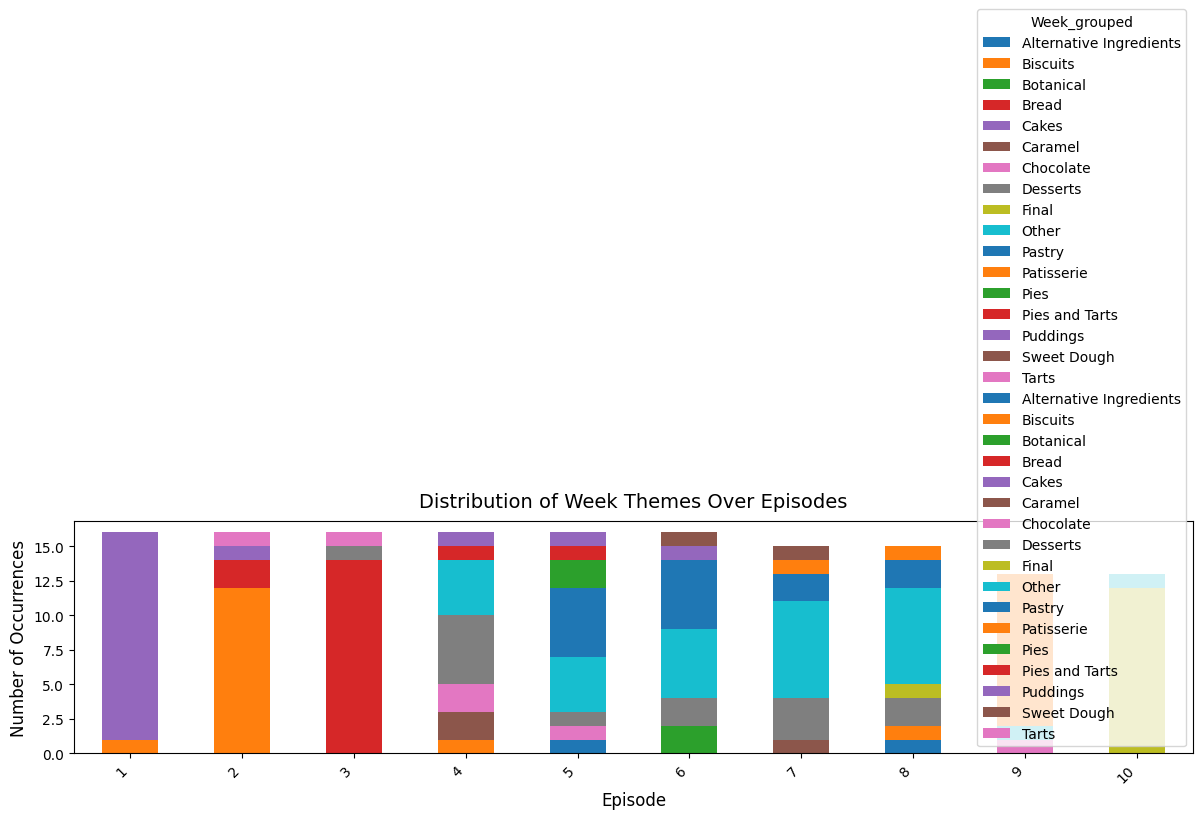

In [ ]:
df['Week_grouped'] = df['Week'].apply(lambda x: x if df['Week'].value_counts()[x] > 1 else 'Other')

# Group by episode and the grouped theme
theme_counts = df.groupby(['Episode', 'Week_grouped']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
theme_counts.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Week Themes Over Episodes', fontsize=14, pad=10)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.legend(title='Week Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# most common theme for quarter finals and semi finals
quarter_finals = df[df['Label'] == 'Quarter-Final']
semi_finals = df[df['Label'] == 'Semi-Final']
print("\nMost common week theme in Quarter-Finals:")
print(quarter_finals['Week'].value_counts().head(1))
print("\nMost common week theme in Semi-Finals:")
print(semi_finals['Week'].value_counts().head(1))


Most common week theme in Quarter-Finals:
Week
Desserts    3
Name: count, dtype: int64

Most common week theme in Semi-Finals:
Week
Patisserie    12
Name: count, dtype: object


In [75]:
# Measure consistency of each theme by episode placement
consistency = (
    df.groupby('Week_grouped')['Episode']
      .apply(lambda x: x.value_counts(normalize=True).max() * 100)
      .sort_values(ascending=False)
)

print(consistency)


Week_grouped
Botanical                  100.000000
Pies                       100.000000
Cakes                       93.750000
Final                       92.307692
Bread                       87.500000
Patisserie                  84.615385
Biscuits                    80.000000
Caramel                     66.666667
Sweet Dough                 50.000000
Pies and Tarts              50.000000
Alternative Ingredients     50.000000
Chocolate                   50.000000
Tarts                       50.000000
Pastry                      35.714286
Desserts                    35.714286
Puddings                    33.333333
Other                       24.137931
Name: Episode, dtype: float64
